# Experimentation 1: Basic Properties of Time Series -- Stationarity
We will investigate basic statistical properties of time series together with the concept of stationarity.

The idea is to implement time series from random numbers, drawn in Python, and then investigate the statistical properties.
The introduction will provide you with additional information on helpful Python functionality.

These experiments will partially give us obvious results, as we know the statistics of the random numbers used,
but will very likely also give us an insight into where the difference between *the average value of one random time series* and *the average of an ensemble of time series* lies.
Hopefully providing a better understanding of how statistical properties can be used to describe an individual implementation of a time series as well as a general description of all possible time series which might be realised by a speific process.

Please also look into the accompanying notes to get a better understanding of the concepts and functions used in this notebook.
(Please allow the accompanying notes to show up with a delay…)

And please use the forum on itslearning to discuss results, questions or what is unclear to you.

## What to do
For
- white noise and
- a random walk

please determine for one realisation of white noise and a random walk each
- mean & variance
- the autocorrelation
- and test stationarity with the Augmented Dickey-Fuller test

and for an ensemble of realisations (try 1000)
- the mean
- and the variance

over these different realisations (for each time point), i.e., creating the average time series.

## Discussion
Prepare for discussion in class, which will take place either in groups or with your neighbours
- How do mean & variance behave for white noise and a random walk? Where is the difference?
- Describe the autocorrelation function. What does the autocorrelation tell us about the signal?
- How do the statistics for the individual and the ensemble of realisations for white noise and random walks differ? What is noteworthy in your opinion? Did you expect this behaviour?
- How do the statistics of slices of the time series compare to the ensemble behaviours?
- Discuss the relation of the statistical measures in the different perspectives to the concept of stationarity. What does stationarity tell you about a time series?
  And how does the stationarity relate to the statistical observations collected above?

Feel free to use the forum on itslearning.

## Good to Know
- Numpy provides the mean & var functions, either directly in functional style (np.mean()) or object oriented as member functions of its array class (x.mean()). Use the method which seems more descriptive to you.
- Statsmodels provides the function [adfuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) for testing the stationarity with the [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test). The second entry in the result contains the p-value, i.e., use this value to determine if the time series can be assumed as stationary. If the p-value is below a threshold, we assume the time series to be stationary.
- Pandas provides ```pandas.plotting.autocorrelation_plot``` to directly plot the autocorrelation function.
An alternative is ```statsmodels.graphics.tsaplots.plot_acf```.
Please try both and find out which resulting graph you personally prefer, i.e., which can you read better.
But be warned that not every laptop will be able to complete both functions on the given data.
One is fast and the other isn't.
- To create a [random number generator with numpy](https://numpy.org/doc/stable/reference/random/index.html#random-quick-start), use the ```default_rng``` import. Use the normal(…) member function to draw a series of random values.
- To prevent multiple plots from ending up in the same figure, you can issue a ```plt.figure()``` before plotting, to make sure a new figure is created.
- Slicing is the python feature used to access a part of an array. Try the following slicing example if you are not familiar with this feature.
```
d = np.linspace(1, 15, 15)
print('Length of time series in samples:', len(d))
print('First 5 samples:', d[:5])
print('Some 5 samples:', d[4:9])
print('Last 5 samples: ', d[-5:])
```
- Normally, the last command's return value will be printed in a cell's output. If you want to supress that output, close the last line with a semicolon;

In [2]:
import numpy as np                            # Array library
import pandas as pd                           # Advanced data frames & csv reading


# Jupyter lab supports interactive plots      # Matplotlib for plotting
# using "widget"
%matplotlib widget

# Jupyter lab doesn't support notebook,
# which was the preferred method for jupyter notebooks.
#%matplotlib notebook
#%matplotlib inline


from matplotlib import pyplot as plt

import seaborn as sns                         # Advanced plotting, support for data frames

# Adjust plot size & resolution for inline display.
# Tune to your needs.
plt.rcParams['figure.figsize'] = [9, 5.56]
plt.rcParams['figure.dpi'] = 100

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller, pacf, acf

from pandas.plotting import autocorrelation_plot

from numpy.random import default_rng

# White Noise
To generate Gaussian noise (a special realisation of White Noise), use numpy.random.default_rng to create a generator from which you can draw a time series of length 5000 with mean 0 and variance 1.

Plot the resulting time series with matplotlib, e.g.,
```
plt.figure()
plt.plot(white_noise)
plt.title('White Noise')
```

Determine the mean & variance before you perform the Augmented Dickey-Fuller test.

Use pandas.plotting.autocorrelation_plot to get the autocorrelation function.

,metric,value
0,sample_mean,0.000315
1,sample_variance (ddof=0),1.026095
2,adf_statistic,-70.746623
3,adf_p_value,0.000000
4,adf_used_lag,0.000000
5,adf_nobs,4999.000000
6,adf_ic_best (AIC),14218.621124
7,adf_crit_1%,-3.431659
8,adf_crit_5%,-2.862118
9,adf_crit_10%,-2.567078



Interpretation:
- Mean ~ 0 and variance ~ 1 are expected for N(0,1).
- If ADF p-value < 0.05, reject unit root → consistent with stationarity.


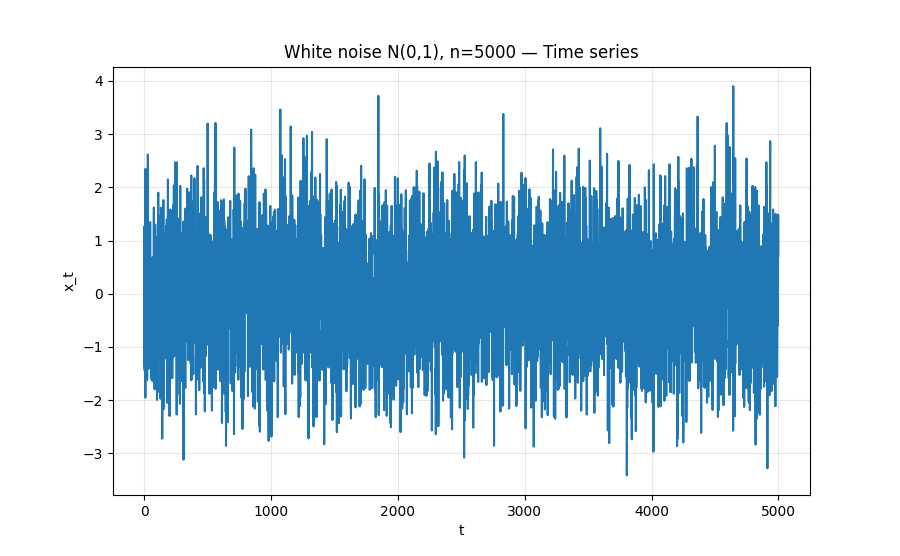

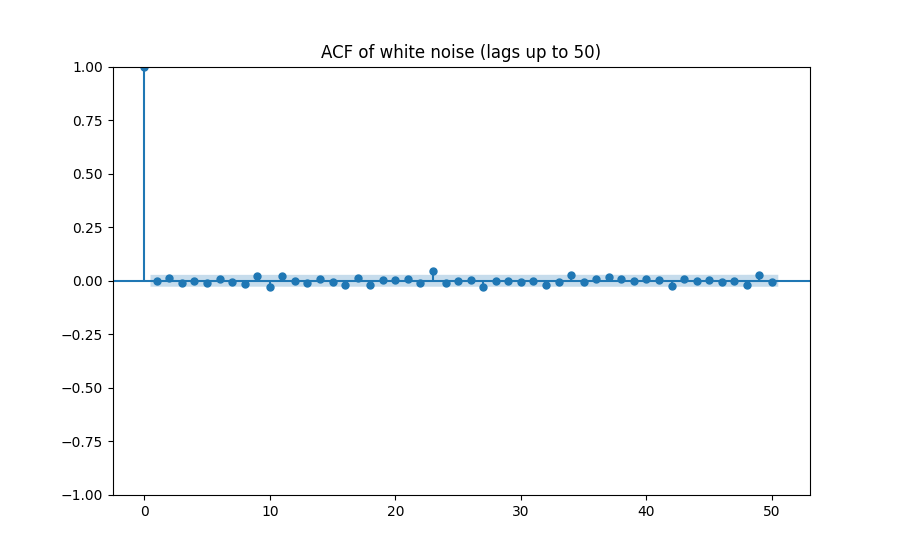

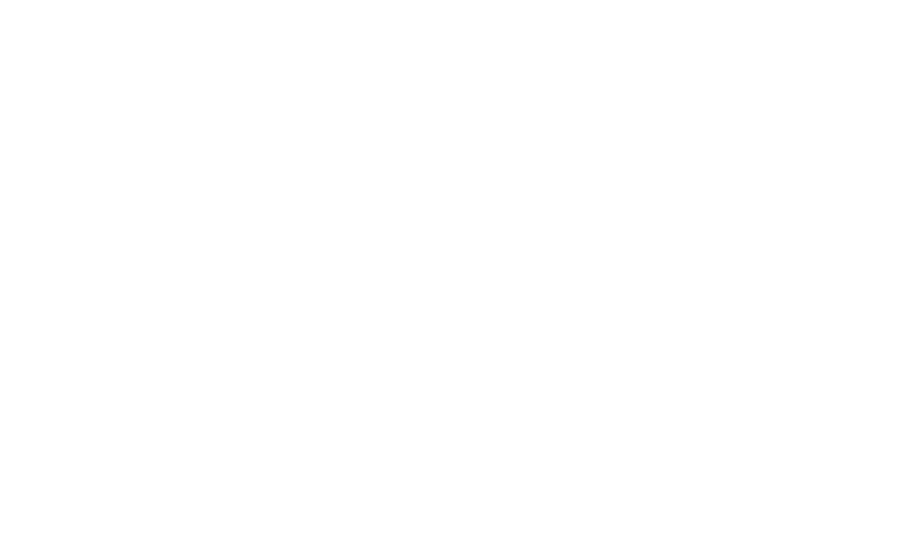

In [4]:
# --- White Noise Task --------------------------------------------------------
# Generate N(0,1) white noise (n=5000), compute stats, run ADF test,
# and plot the time series plus its ACF.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Parameters (tweak as you like)
n = 5000
seed = 12345
acf_lags = 50

# 1) Generate white noise
rng = np.random.default_rng(seed)
x = rng.normal(loc=0.0, scale=1.0, size=n)

# 2) Basic statistics
sample_mean = float(np.mean(x))
# Population variance (ddof=0) should be ~1 for N(0,1)
sample_var = float(np.var(x, ddof=0))

# 3) Augmented Dickey–Fuller test (unit root test)
adf_stat, p_value, used_lag, nobs, crit_vals, ic_best = adfuller(x, autolag="AIC")

# 4) Nicely formatted summary
summary = pd.DataFrame(
    {
        "metric": [
            "sample_mean",
            "sample_variance (ddof=0)",
            "adf_statistic",
            "adf_p_value",
            "adf_used_lag",
            "adf_nobs",
            "adf_ic_best (AIC)",
            "adf_crit_1%",
            "adf_crit_5%",
            "adf_crit_10%",
        ],
        "value": [
            sample_mean,
            sample_var,
            adf_stat,
            p_value,
            used_lag,
            int(nobs),
            ic_best,
            crit_vals["1%"],
            crit_vals["5%"],
            crit_vals["10%"],
        ],
    }
)
display(summary)

print(
    f"\nInterpretation:\n"
    f"- Mean ~ 0 and variance ~ 1 are expected for N(0,1).\n"
    f"- If ADF p-value < 0.05, reject unit root → consistent with stationarity."
)

# 5) Time series plot
plt.figure()
plt.plot(x)
plt.title(f"White noise N(0,1), n={n} — Time series")
plt.xlabel("t")
plt.ylabel("x_t")
plt.grid(True, alpha=0.3)
plt.show()

# 6) Autocorrelation function (ACF) plot
plt.figure()
plot_acf(x, lags=acf_lags, alpha=0.05)
plt.title(f"ACF of white noise (lags up to {acf_lags})")
plt.show()
# ---------------------------------------------------------------------------


# Random Walk
Realise a Random Walk by summing up Gaussian Noise. Then plot the resulting time series.

Determine the mean & variance before you perform the Augmented Dickey-Fuller test.

Use pandas.plotting.autocorrelation_plot to get the autocorrelation function.

,metric,value
0,sample_mean,31.376351
1,sample_variance (ddof=0),539.918587
2,adf_statistic,-1.597628
3,adf_p_value,0.484785
4,adf_used_lag,0.000000
5,adf_nobs,4999.000000
6,adf_ic_best (AIC),14216.388420
7,adf_crit_1%,-3.431659
8,adf_crit_5%,-2.862118
9,adf_crit_10%,-2.567078



Interpretation:
- Random walk is typically NON-stationary (has a unit root).
- Expect ADF p-value >= 0.05 → fail to reject unit root.
- Variance increases with time; ACF shows very slow decay (near 1 at small lags).


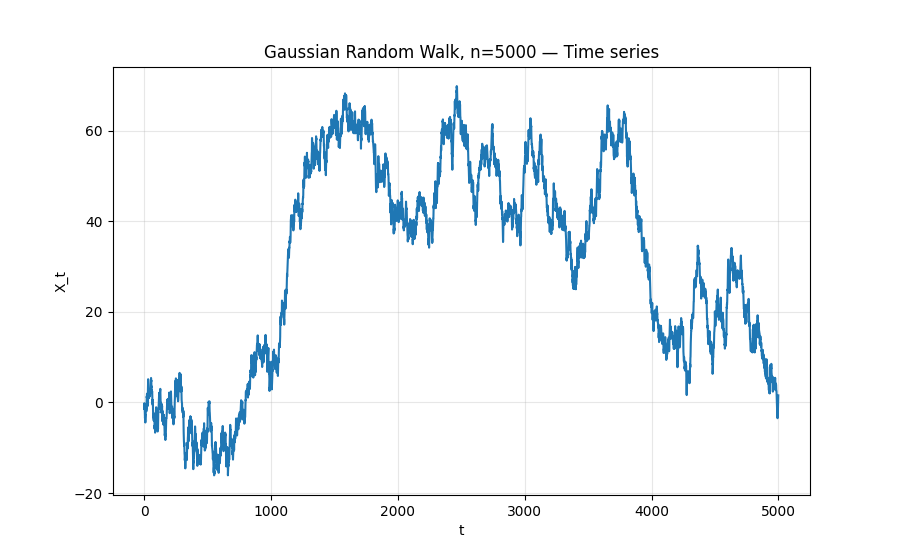

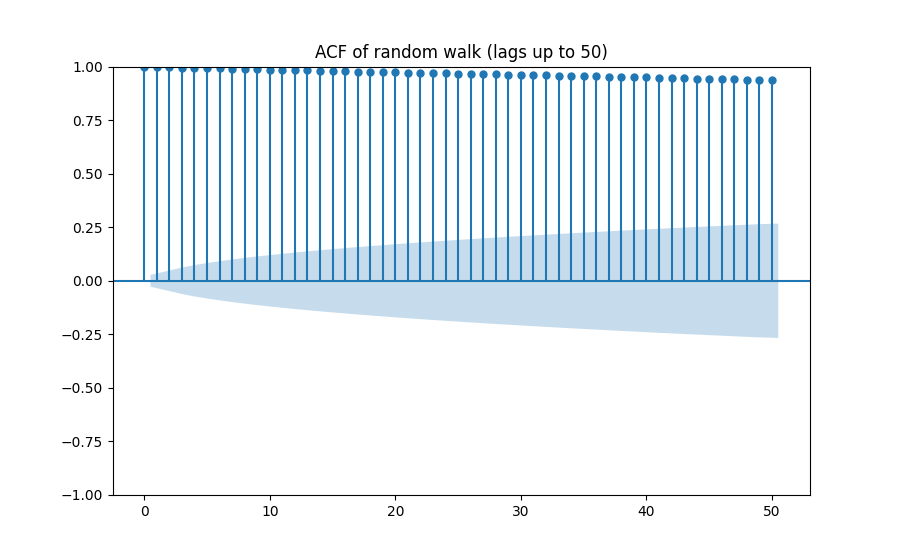

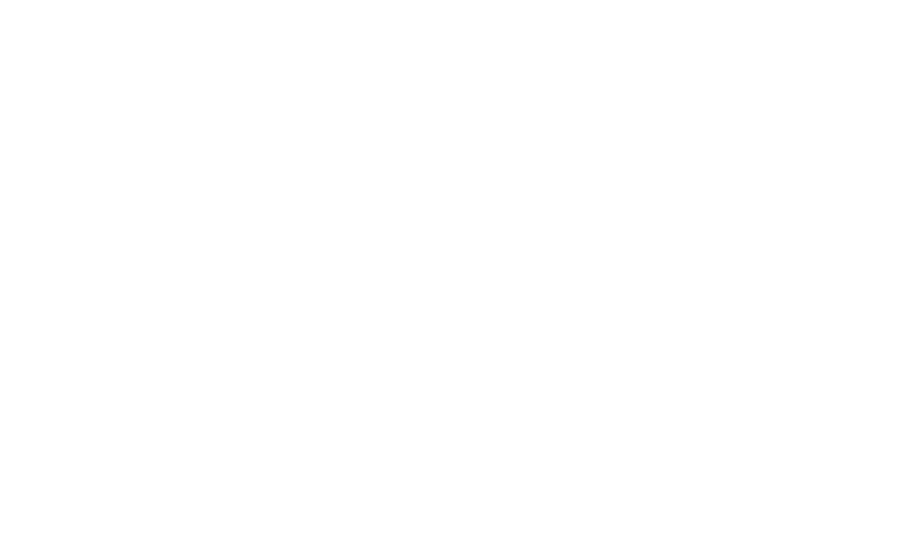

In [5]:
# --- Random Walk Task --------------------------------------------------------
# Generate a random walk from Gaussian increments, compute stats, run ADF test,
# and plot the time series plus its ACF.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Parameters (tweak as you like)
n = 5000
seed = 12345
acf_lags = 50

# 1) Generate random walk: X_t = X_{t-1} + ε_t, ε_t ~ N(0,1), X_0 = 0
rng = np.random.default_rng(seed)
eps = rng.normal(loc=0.0, scale=1.0, size=n)
x = np.cumsum(eps)  # random walk series (length n), starting at 0

# 2) Basic statistics
sample_mean = float(np.mean(x))
sample_var = float(np.var(x, ddof=0))  # should grow with n for a random walk

# 3) Augmented Dickey–Fuller test (unit root test)
adf_stat, p_value, used_lag, nobs, crit_vals, ic_best = adfuller(x, autolag="AIC")

# 4) Nicely formatted summary
summary = pd.DataFrame(
    {
        "metric": [
            "sample_mean",
            "sample_variance (ddof=0)",
            "adf_statistic",
            "adf_p_value",
            "adf_used_lag",
            "adf_nobs",
            "adf_ic_best (AIC)",
            "adf_crit_1%",
            "adf_crit_5%",
            "adf_crit_10%",
        ],
        "value": [
            sample_mean,
            sample_var,
            adf_stat,
            p_value,
            used_lag,
            int(nobs),
            ic_best,
            crit_vals["1%"],
            crit_vals["5%"],
            crit_vals["10%"],
        ],
    }
)
display(summary)

print(
    "\nInterpretation:\n"
    "- Random walk is typically NON-stationary (has a unit root).\n"
    "- Expect ADF p-value >= 0.05 → fail to reject unit root.\n"
    "- Variance increases with time; ACF shows very slow decay (near 1 at small lags)."
)

# 5) Time series plot
plt.figure()
plt.plot(x)
plt.title(f"Gaussian Random Walk, n={n} — Time series")
plt.xlabel("t")
plt.ylabel("X_t")
plt.grid(True, alpha=0.3)
plt.show()

# 6) Autocorrelation function (ACF) plot
plt.figure()
plot_acf(x, lags=acf_lags, alpha=0.05)
plt.title(f"ACF of random walk (lags up to {acf_lags})")
plt.show()

# (Optional) Check that increments are white noise:
# plt.figure()
# plot_acf(np.diff(x), lags=acf_lags, alpha=0.05)
# plt.title(f"ACF of random-walk increments (lags up to {acf_lags})")
# plt.show()
# ---------------------------------------------------------------------------


# Investigating an Ensemble of Realisations
Create 1000 realisations of white noise and random walks each. Investigate the mean and the variance over these realisations, i.e., per time step, by plotting them. Use 5000 time steps again.

Also, plot 100 time steps of 30 individual random walks.

**Notes**
- When having a number of realisations, use 2D-arrays. Matplotlib can plot a 2D-array as a set of plots. Please note, that the individual realisations would be expected in the columns of the array in this case!
- Create an empty array of length N using numpy.zeros, i.e., ```np.zeros((N))```.
- Create an empty 2D-array with r rows and c columns, use ```np.zeros((r, c))```.

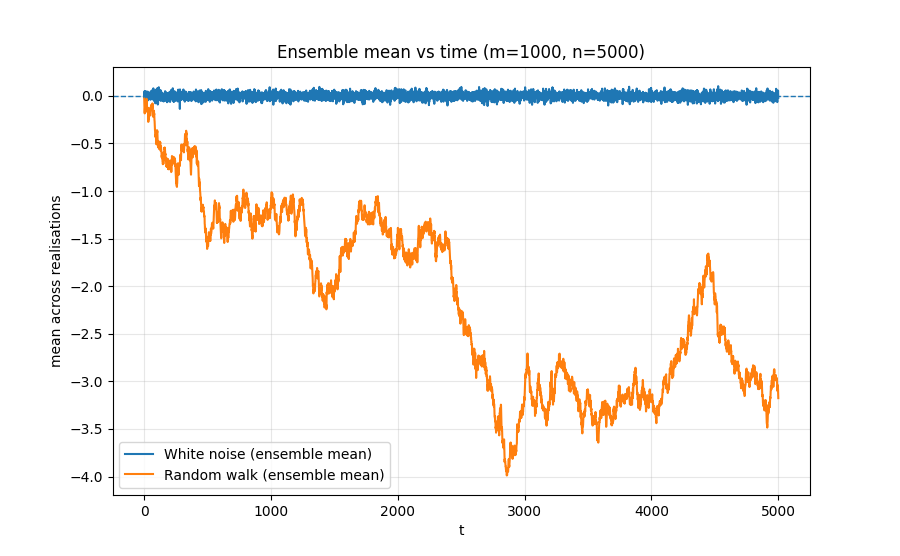

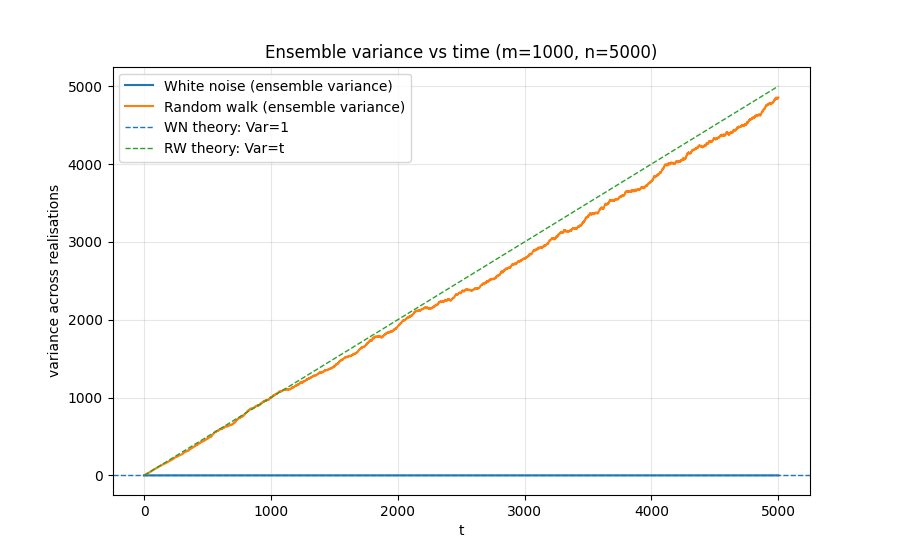

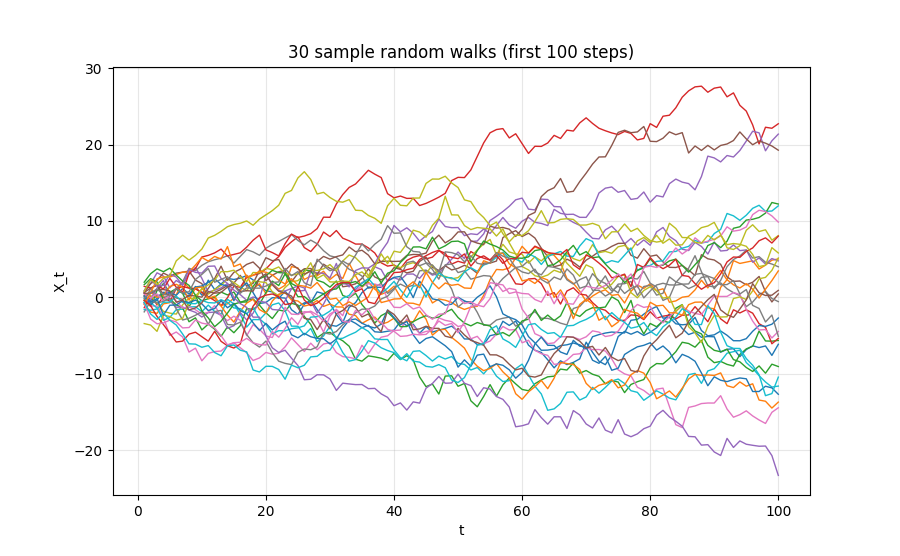

White noise mean_t (first/last 3) ~ 0: [ 0.0207 -0.0166  0.0065] ... [ 0.0558 -0.0006 -0.0198]
White noise var_t (first/last 3) ~ 1: [1.059  1.021  1.0317] ... [1.0013 0.9919 1.0121]
Random walk mean_t (first/last 3) ~ 0: [-0.0275 -0.0837 -0.1207] ... [-3.0905 -3.1646 -3.1765]
Random walk var_t / t at t=n ≈ 1.0: 0.971


In [6]:
# --- Investigating an Ensemble of Realisations --------------------------------
# Builds ensembles for white noise and random walk, then visualizes ensemble
# mean/variance vs time and shows sample paths.

import numpy as np
import matplotlib.pyplot as plt

# Parameters (tweak as needed)
n = 5000        # length of each time series
m = 1000        # number of realisations in the ensemble
seed = 12345    # RNG seed for reproducibility
k_show = 30     # how many random-walk sample paths to show
t_show = 100    # how many initial steps to display for those paths

rng = np.random.default_rng(seed)

# --- White noise ensemble: ε_t ~ N(0,1) --------------------------------------
wn = rng.normal(loc=0.0, scale=1.0, size=(m, n))   # shape: (realisations, time)
wn_mean_t = wn.mean(axis=0)
wn_var_t  = wn.var(axis=0, ddof=0)  # population variance (theory: ~1)

# --- Random walk ensemble: X_t = X_{t-1} + ε_t, X_1 = ε_1 --------------------
# We generate increments and cumsum along time axis.
eps = rng.normal(loc=0.0, scale=1.0, size=(m, n))
rw  = np.cumsum(eps, axis=1)  # X[:, j] = sum_{i=0..j} eps

rw_mean_t = rw.mean(axis=0)
rw_var_t  = rw.var(axis=0, ddof=0)  # theory: Var[X_t] = t (for unit-variance ε)

# Time index: for rw constructed via cumsum, column j corresponds to step t=j+1
t = np.arange(1, n + 1)

# --- Plot: Ensemble mean vs time (both processes) ----------------------------
plt.figure()
plt.plot(t, wn_mean_t, label="White noise (ensemble mean)")
plt.plot(t, rw_mean_t, label="Random walk (ensemble mean)")
plt.axhline(0.0, linestyle="--", linewidth=1)
plt.title(f"Ensemble mean vs time (m={m}, n={n})")
plt.xlabel("t")
plt.ylabel("mean across realisations")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Plot: Ensemble variance vs time (both processes + theory) ---------------
plt.figure()
plt.plot(t, wn_var_t, label="White noise (ensemble variance)")
plt.plot(t, rw_var_t, label="Random walk (ensemble variance)")
# Theory overlays
plt.axhline(1.0, linestyle="--", linewidth=1, label="WN theory: Var=1")
plt.plot(t, t, linestyle="--", linewidth=1, label="RW theory: Var=t")
plt.title(f"Ensemble variance vs time (m={m}, n={n})")
plt.xlabel("t")
plt.ylabel("variance across realisations")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Plot: 30 sample random walks (first 100 steps) --------------------------
plt.figure()
idx = np.random.default_rng(seed + 1).choice(m, size=k_show, replace=False)
plt.plot(np.arange(1, t_show + 1), rw[idx, :t_show].T, linewidth=1)
plt.title(f"{k_show} sample random walks (first {t_show} steps)")
plt.xlabel("t")
plt.ylabel("X_t")
plt.grid(True, alpha=0.3)
plt.show()

# --- Quick numeric checks -----------------------------------------------------
print("White noise mean_t (first/last 3) ~ 0:",
      np.round(wn_mean_t[:3], 4), "...", np.round(wn_mean_t[-3:], 4))
print("White noise var_t (first/last 3) ~ 1:",
      np.round(wn_var_t[:3], 4), "...", np.round(wn_var_t[-3:], 4))
print("Random walk mean_t (first/last 3) ~ 0:",
      np.round(rw_mean_t[:3], 4), "...", np.round(rw_mean_t[-3:], 4))
print("Random walk var_t / t at t=n ≈ 1.0:",
      round(rw_var_t[-1] / n, 4))
# -----------------------------------------------------------------------------


# How do Mean and Variance Vary with Time in a Time Series?
Investigate the local mean and variance of one time series.

To do this, use slicing to access parts of the array which contains the time series.
These slices behave just like arrays.

Create a new time series by looking at equally sized chunks of the original time series and determining the mean / variance for each of these. As a result, you will get a time series of the local mean / variance of the original time series.

Compare to the ensemble results.

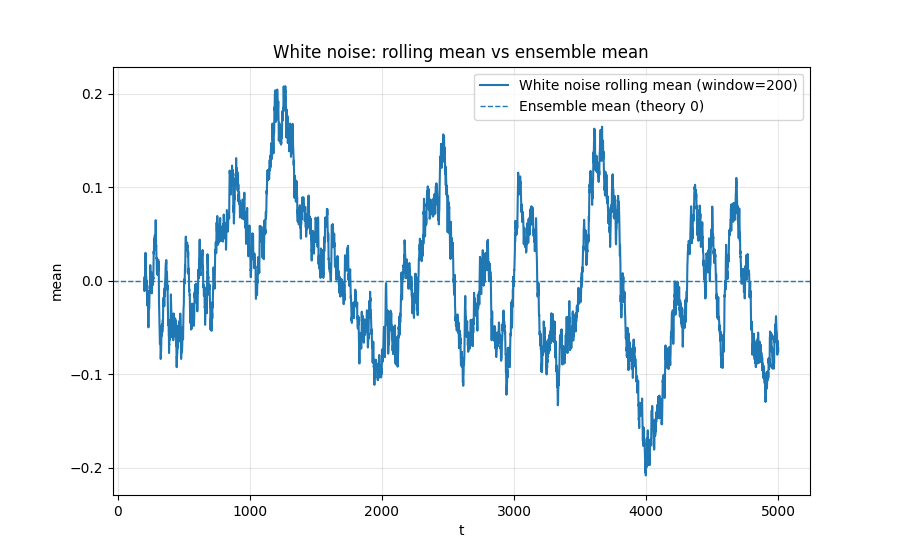

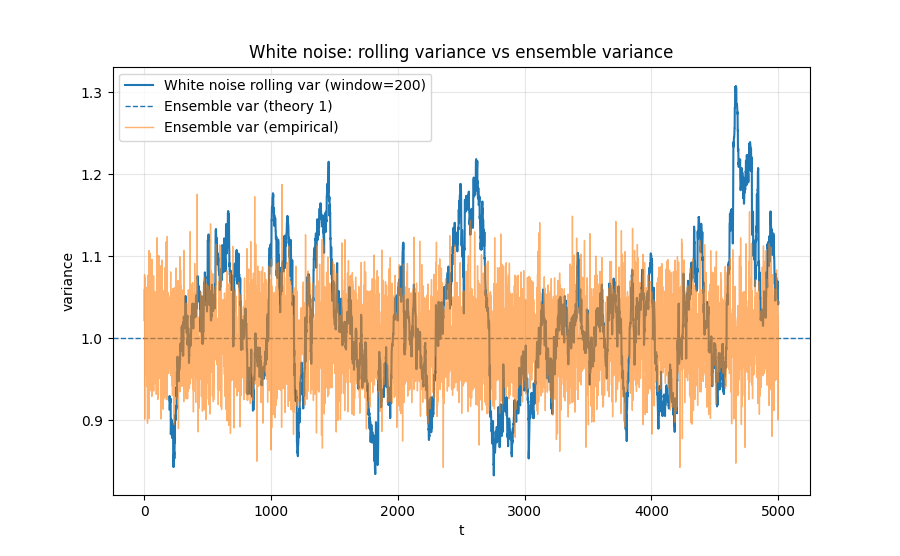

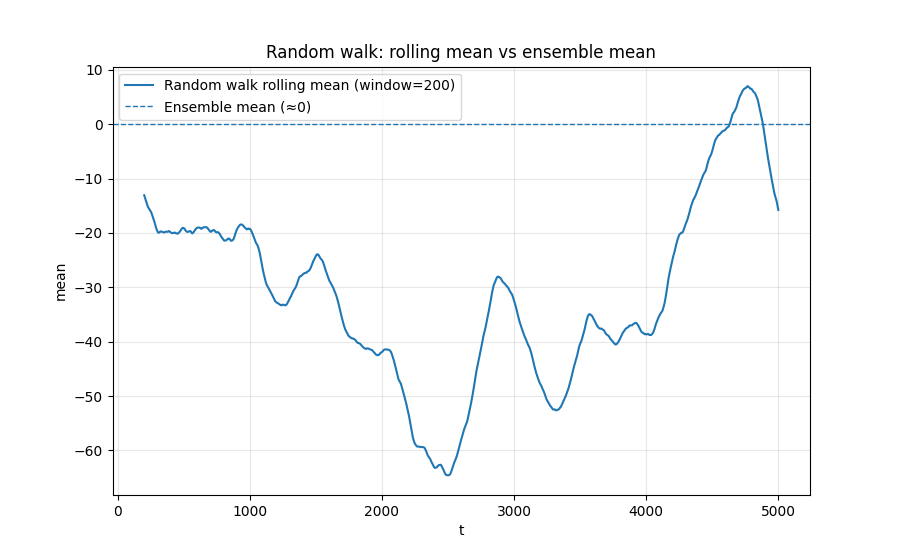

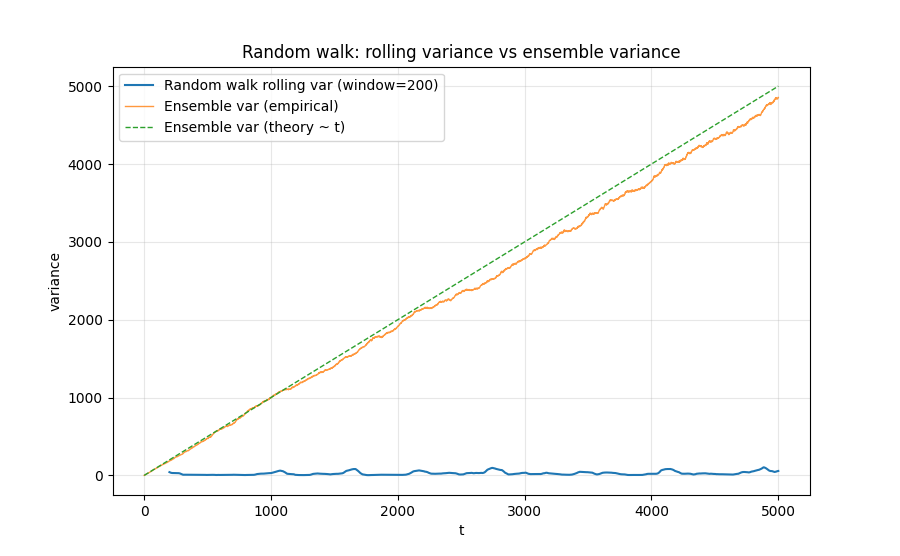

[WN]  mean_t (first/last 3): [ 0.0207 -0.0166  0.0065] ... [ 0.0558 -0.0006 -0.0198]
[WN]  var_t  (first/last 3): [1.059  1.021  1.0317] ... [1.0013 0.9919 1.0121]
[RW]  mean_t (first/last 3): [-0.0275 -0.0837 -0.1207] ... [-3.0905 -3.1646 -3.1765]
[RW]  var_t/t at t=n: 0.971  (should be ≈ 1)
Rolling window = 200. NaNs at the start reflect the warm-up (min_periods=window).


In [7]:
# --- How do Mean and Variance Vary with Time in a Time Series? ----------------
# Compare time-local (rolling) mean/variance for a SINGLE series
# against ensemble mean/variance across MANY realisations.
#
# For white noise: time averages ≈ ensemble averages (ergodic).
# For random walk: they disagree (non-stationary with a unit root).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------- Parameters (tweak as needed) --------------------------
n = 5000        # length of each series
m = 1000        # number of realisations in the ensemble
seed = 12345    # RNG seed for reproducibility
win = 200       # rolling window size for local stats (samples)
realisation_idx = 0  # which single path to analyze for rolling stats

rng = np.random.default_rng(seed)
t = np.arange(1, n + 1)

# -------------------------- Build ensembles ----------------------------------
# White noise: ε_t ~ N(0,1)
wn = rng.normal(0.0, 1.0, size=(m, n))             # shape (m, n)

# Random walk: X_t = X_{t-1} + ε_t, X_1 = ε_1, ε_t ~ N(0,1)
eps = rng.normal(0.0, 1.0, size=(m, n))
rw = np.cumsum(eps, axis=1)

# ---------------------- Ensemble statistics vs time ---------------------------
wn_mean_t = wn.mean(axis=0)
wn_var_t  = wn.var(axis=0, ddof=0)                  # theory ≈ 1

rw_mean_t = rw.mean(axis=0)
rw_var_t  = rw.var(axis=0, ddof=0)                  # theory ≈ t

# ------------------ Rolling (time-local) stats for one path -------------------
def rolling_mean_var(x, window):
    s = pd.Series(x)
    rmean = s.rolling(window=window, min_periods=window).mean()
    rvar  = s.rolling(window=window, min_periods=window).var(ddof=0)
    return rmean.to_numpy(), rvar.to_numpy()

# Pick one realization
wn_one = wn[realisation_idx]
rw_one = rw[realisation_idx]

wn_roll_mean, wn_roll_var = rolling_mean_var(wn_one, win)
rw_roll_mean, rw_roll_var = rolling_mean_var(rw_one, win)

# ------------------------------ Plots -----------------------------------------
# 1) White noise: rolling mean vs ensemble mean (≈0)
plt.figure()
plt.plot(t, wn_roll_mean, label=f"White noise rolling mean (window={win})")
plt.axhline(0.0, linestyle="--", linewidth=1, label="Ensemble mean (theory 0)")
plt.title("White noise: rolling mean vs ensemble mean")
plt.xlabel("t"); plt.ylabel("mean")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# 2) White noise: rolling variance vs ensemble variance (≈1)
plt.figure()
plt.plot(t, wn_roll_var, label=f"White noise rolling var (window={win})")
plt.axhline(1.0, linestyle="--", linewidth=1, label="Ensemble var (theory 1)")
plt.plot(t, wn_var_t, linewidth=1, alpha=0.6, label="Ensemble var (empirical)")
plt.title("White noise: rolling variance vs ensemble variance")
plt.xlabel("t"); plt.ylabel("variance")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# 3) Random walk: rolling mean vs ensemble mean (≈0)
plt.figure()
plt.plot(t, rw_roll_mean, label=f"Random walk rolling mean (window={win})")
plt.axhline(0.0, linestyle="--", linewidth=1, label="Ensemble mean (≈0)")
plt.title("Random walk: rolling mean vs ensemble mean")
plt.xlabel("t"); plt.ylabel("mean")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# 4) Random walk: rolling variance vs ensemble variance (≈ t)
plt.figure()
plt.plot(t, rw_roll_var, label=f"Random walk rolling var (window={win})")
plt.plot(t, rw_var_t, linewidth=1, alpha=0.8, label="Ensemble var (empirical)")
plt.plot(t, t, linestyle="--", linewidth=1, label="Ensemble var (theory ~ t)")
plt.title("Random walk: rolling variance vs ensemble variance")
plt.xlabel("t"); plt.ylabel("variance")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# -------------------------- Quick numeric checks ------------------------------
print(f"[WN]  mean_t (first/last 3): {np.round(wn_mean_t[:3],4)} ... {np.round(wn_mean_t[-3:],4)}")
print(f"[WN]  var_t  (first/last 3): {np.round(wn_var_t[:3],4)} ... {np.round(wn_var_t[-3:],4)}")
print(f"[RW]  mean_t (first/last 3): {np.round(rw_mean_t[:3],4)} ... {np.round(rw_mean_t[-3:],4)}")
print(f"[RW]  var_t/t at t=n: {rw_var_t[-1]/n:.3f}  (should be ≈ 1)")
print(f"Rolling window = {win}. NaNs at the start reflect the warm-up (min_periods=window).")
# ------------------------------------------------------------------------------


In [ ]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf

# --- Load EDF data with pyEDFlib ---
edf = pyedflib.EdfReader("./data/seizure_eeg_data/01.edf")
n_signals = edf.signals_in_file
signal_labels = edf.getSignalLabels()

# Take first channel (you can loop over all if needed)
sig = edf.readSignal(0)
edf.close()

# --- Basic Statistics ---
mean = np.mean(sig)
var = np.var(sig)
std = np.std(sig)
print(f"Signal: {signal_labels[0]}")
print(f"Mean: {mean:.4f}, Variance: {var:.4f}, Std: {std:.4f}")

# --- Stationarity test (ADF) ---
adf_result = adfuller(sig)
print("\nADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("=> Stationary (reject null)")
else:
    print("=> Non-stationary (fail to reject null)")

# --- Autocorrelation ---
acf_vals = acf(sig, nlags=50)  # first 50 lags
plt.figure(figsize=(8,4))
plt.stem(acf_vals, use_line_collection=True)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()


Signal: EEG Fp1-REF
Mean: 0.3947, Variance: 71638.1204, Std: 267.6530
